# blobs
``blobs`` is a simple function to generate a test image.  It works by generating random noise, applying a guassian blur, renormalizing the result back to a uniform distribution, then thresholding the result to produce a binary image.


In [1]:
import porespy as ps
import matplotlib.pyplot as plt
import numpy as np

## Default Usage
The basic usage is as follows:

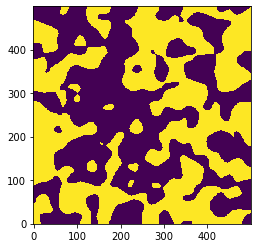

In [2]:
im = ps.generators.blobs(shape=[500, 500], porosity=0.5, blobiness=1)
plt.imshow(im, origin='lower', interpolation='none');

## Adjusting Porosity and Morhpology
You can increase the porosity or change the size of the blobs.  The ``blobiness`` parameter controls the size and shape of the kernal used during the gaussian blur:

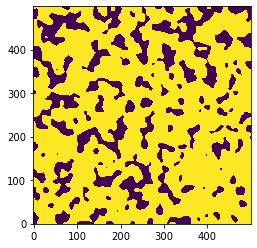

In [3]:
im = ps.generators.blobs(shape=[500, 500], porosity=0.75, blobiness=2)
plt.imshow(im, origin='lower', interpolation='none');

Image shape and anisotropy of the blobs can be changed:

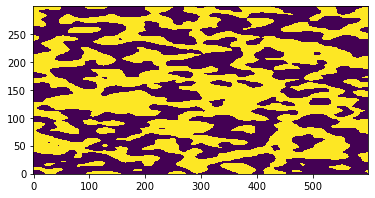

In [4]:
im = ps.generators.blobs(shape=[300, 600], porosity=0.5, blobiness=[3, 1])
plt.imshow(im, origin='lower', interpolation='none');

## Manual Thresholding
Setting ``porosity=None`` will return an unthresholded image which you can manually threshold if needed:

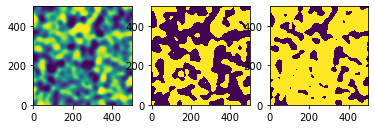

In [5]:
im = ps.generators.blobs(shape=[500, 500], porosity=None, blobiness=1)
fig, ax = plt.subplots(1, 3)
ax[0].imshow(im, origin='lower', interpolation='none')
ax[1].imshow(im < 0.5, origin='lower', interpolation='none')
ax[2].imshow(im < 0.75, origin='lower', interpolation='none');

# Reproducing Images
The random is controlled by numpy's random number generator so the same image can be produced by setting the seed:

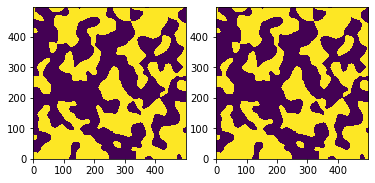

In [7]:
np.random.seed(0)
im1 = ps.generators.blobs(shape=[500, 500], porosity=0.5, blobiness=[1, 1])
np.random.seed(0)
im2 = ps.generators.blobs(shape=[500, 500], porosity=0.5, blobiness=[1, 1])
fig, ax = plt.subplots(1, 2)
ax[0].imshow(im1, origin='lower', interpolation='none')
ax[1].imshow(im2, origin='lower', interpolation='none');